In [1]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [8]:
with open("C:/Users/yash/Applied-Deep-Learning-and-Computer-Vision-for-Self-Driving-Cars-master/Applied-Deep-Learning-and-Computer-Vision-for-Self-Driving-Cars-master/Chapter07/traffic-signs-data/train.p", mode='rb') as training_data:
  train = pickle.load(training_data)
with open("C:/Users/yash/Applied-Deep-Learning-and-Computer-Vision-for-Self-Driving-Cars-master/Applied-Deep-Learning-and-Computer-Vision-for-Self-Driving-Cars-master/Chapter07/traffic-signs-data/valid.p", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("C:/Users/yash/Applied-Deep-Learning-and-Computer-Vision-for-Self-Driving-Cars-master/Applied-Deep-Learning-and-Computer-Vision-for-Self-Driving-Cars-master/Chapter07/traffic-signs-data/test.p", mode='rb') as testing_data:
  test = pickle.load(testing_data)

In [9]:
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']
x_train.shape

(34799, 32, 32, 3)

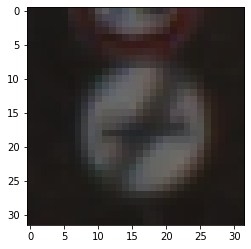

In [10]:
plt.imshow(x_train[0])

In [11]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [12]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_valid_gray = np.sum(x_valid/3, axis=3, keepdims=True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims=True)

In [13]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_valid_gray_norm = (x_valid_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128

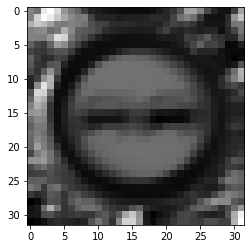

In [14]:
plt.imshow(x_train_gray[0].squeeze(), cmap='gray')

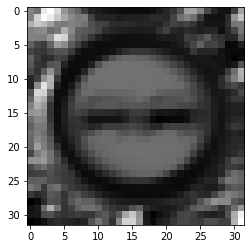

In [15]:
plt.imshow(x_train_gray_norm[0].squeeze(), cmap='gray')

In [22]:
x_train_gray.shape[1:]

(32, 32, 1)

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from subprocess import check_output
from sklearn.model_selection import train_test_split

In [23]:
image_shape = x_train_gray.shape[1:]
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3), input_shape=image_shape, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(43, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 128)               1605760   
                                                      

In [29]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.Adam(0.001), metrics=['accuracy'])

In [30]:
hist = model.fit(x_train_gray_norm, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(x_valid_gray_norm, y_valid))

Epoch 1/5
1088/1088 [==============================] - 61s 56ms/step - loss: 0.2408 - accuracy: 0.9263 - val_loss: 0.1531 - val_accuracy: 0.9603
Epoch 2/5
1088/1088 [==============================] - 64s 59ms/step - loss: 0.1719 - accuracy: 0.9468 - val_loss: 0.1356 - val_accuracy: 0.9619
Epoch 3/5
1088/1088 [==============================] - 65s 60ms/step - loss: 0.1357 - accuracy: 0.9579 - val_loss: 0.1417 - val_accuracy: 0.9642
Epoch 4/5
1088/1088 [==============================] - 62s 57ms/step - loss: 0.1168 - accuracy: 0.9631 - val_loss: 0.1163 - val_accuracy: 0.9669
Epoch 5/5
1088/1088 [==============================] - 62s 57ms/step - loss: 0.0969 - accuracy: 0.9692 - val_loss: 0.1059 - val_accuracy: 0.9717


In [36]:
score = model.evaluate(x_test_gray_norm, y_test, verbose=0)
print(score[1])
print(score[0])

0.9607284069061279
0.17137941718101501


<Figure size 432x288 with 0 Axes>

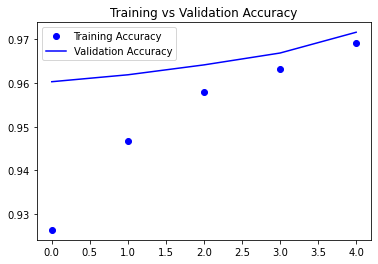

<Figure size 432x288 with 0 Axes>

In [34]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

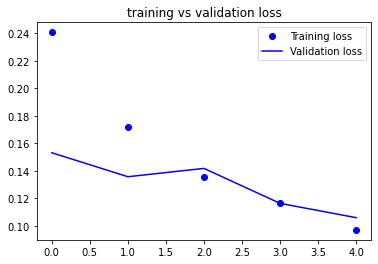

<Figure size 432x288 with 0 Axes>

In [35]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('training vs validation loss')
plt.legend()
plt.figure()

In [37]:
model.save("trafficsign.h5")

In [38]:
model = tf.keras.models.load_model('trafficsign.h5')

In [43]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [41]:
conda install graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\yash\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.11.0               |   py39haa95532_0        14.4 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    ------------------------------------------------------------
                                           Total:        43.7 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 4.11.0-py39haa95532_0




conda-4.11.0         | 14.4 MB   |            |   0% 
conda-4.11.0         | 14.4 MB   |            |   0% 
conda-4.11.0         | 14

In [42]:
!pip install pydot

In [45]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=False, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [48]:
predict_x=model.predict(x_test_gray_norm) 
classes_x=np.argmax(predict_x,axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, classes_x)
cm

array([[ 53,   3,   0, ...,   0,   0,   0],
       [  0, 704,   5, ...,   0,   0,   0],
       [  0,  72, 678, ...,   0,   0,   0],
       ...,
       [  0,   4,   1, ...,  78,   0,   0],
       [  0,   0,   0, ...,   0,  29,   0],
       [  0,   0,   0, ...,   0,   2,  83]], dtype=int64)

In [50]:
cm[:5,:5]

array([[ 53,   3,   0,   0,   2],
       [  0, 704,   5,   0,   3],
       [  0,  72, 678,   0,   0],
       [  0,   0,   1, 437,   0],
       [  0,   8,  15,   0, 632]], dtype=int64)

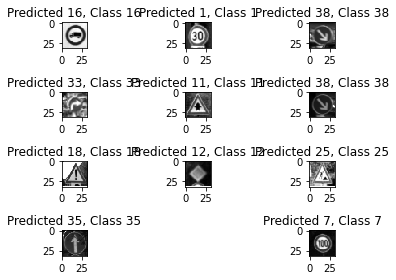

In [53]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_test_gray_norm[i].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes_x[i], y_true[i]))
    plt.tight_layout()

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_true, classes_x))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        60
           1       0.87      0.98      0.92       720
           2       0.93      0.90      0.92       750
           3       0.95      0.97      0.96       450
           4       0.98      0.96      0.97       660
           5       0.86      0.94      0.90       630
           6       0.99      0.81      0.89       150
           7       0.96      0.85      0.90       450
           8       0.97      0.90      0.94       450
           9       0.93      1.00      0.96       480
          10       0.98      0.99      0.99       660
          11       0.95      0.99      0.97       420
          12       1.00      0.99      0.99       690
          13       1.00      1.00      1.00       720
          14       0.99      1.00      0.99       270
          15       0.95      1.00      0.97       210
          16       1.00      0.97      0.98       150
          17       0.99    